In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
# Load dataset
file_path = "Music_Mental_Health.csv"
df = pd.read_csv(file_path)
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
# Display unique values for relevant columns
relevant_columns = ['Hours per day', 'Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']
for col in relevant_columns:
    print(f"{col}: {df[col].unique()}")

Hours per day: [ 3.    1.5   4.    2.5   5.    1.    6.    8.    2.   12.   24.    0.5
  0.25  0.    7.   10.    9.    0.7   4.5  20.   16.   15.   14.   13.
  0.1  11.   18.  ]
Fav genre: ['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']
Anxiety: [ 3.   7.   9.   8.   4.   5.   2.   1.   6.  10.   0.   7.5]
Depression: [ 0.   2.   7.   8.   3.   1.   4.   5.   9.  10.   6.   3.5]
Insomnia: [ 1.   2.  10.   3.   5.   7.   6.   0.   4.   8.   9.   3.5]
OCD: [ 0.   1.   2.   3.   9.   7.   4.   6.  10.   5.   8.   8.5  5.5]
Music effects: [nan 'No effect' 'Improve' 'Worsen']


In [5]:
# Drop rows with missing mental health data
df = df.dropna(subset=['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Hours per day', 'Fav genre'])

In [6]:
# Convert variables to numerical
df[['Anxiety', 'Depression', 'Insomnia', 'OCD']] = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].astype(float)

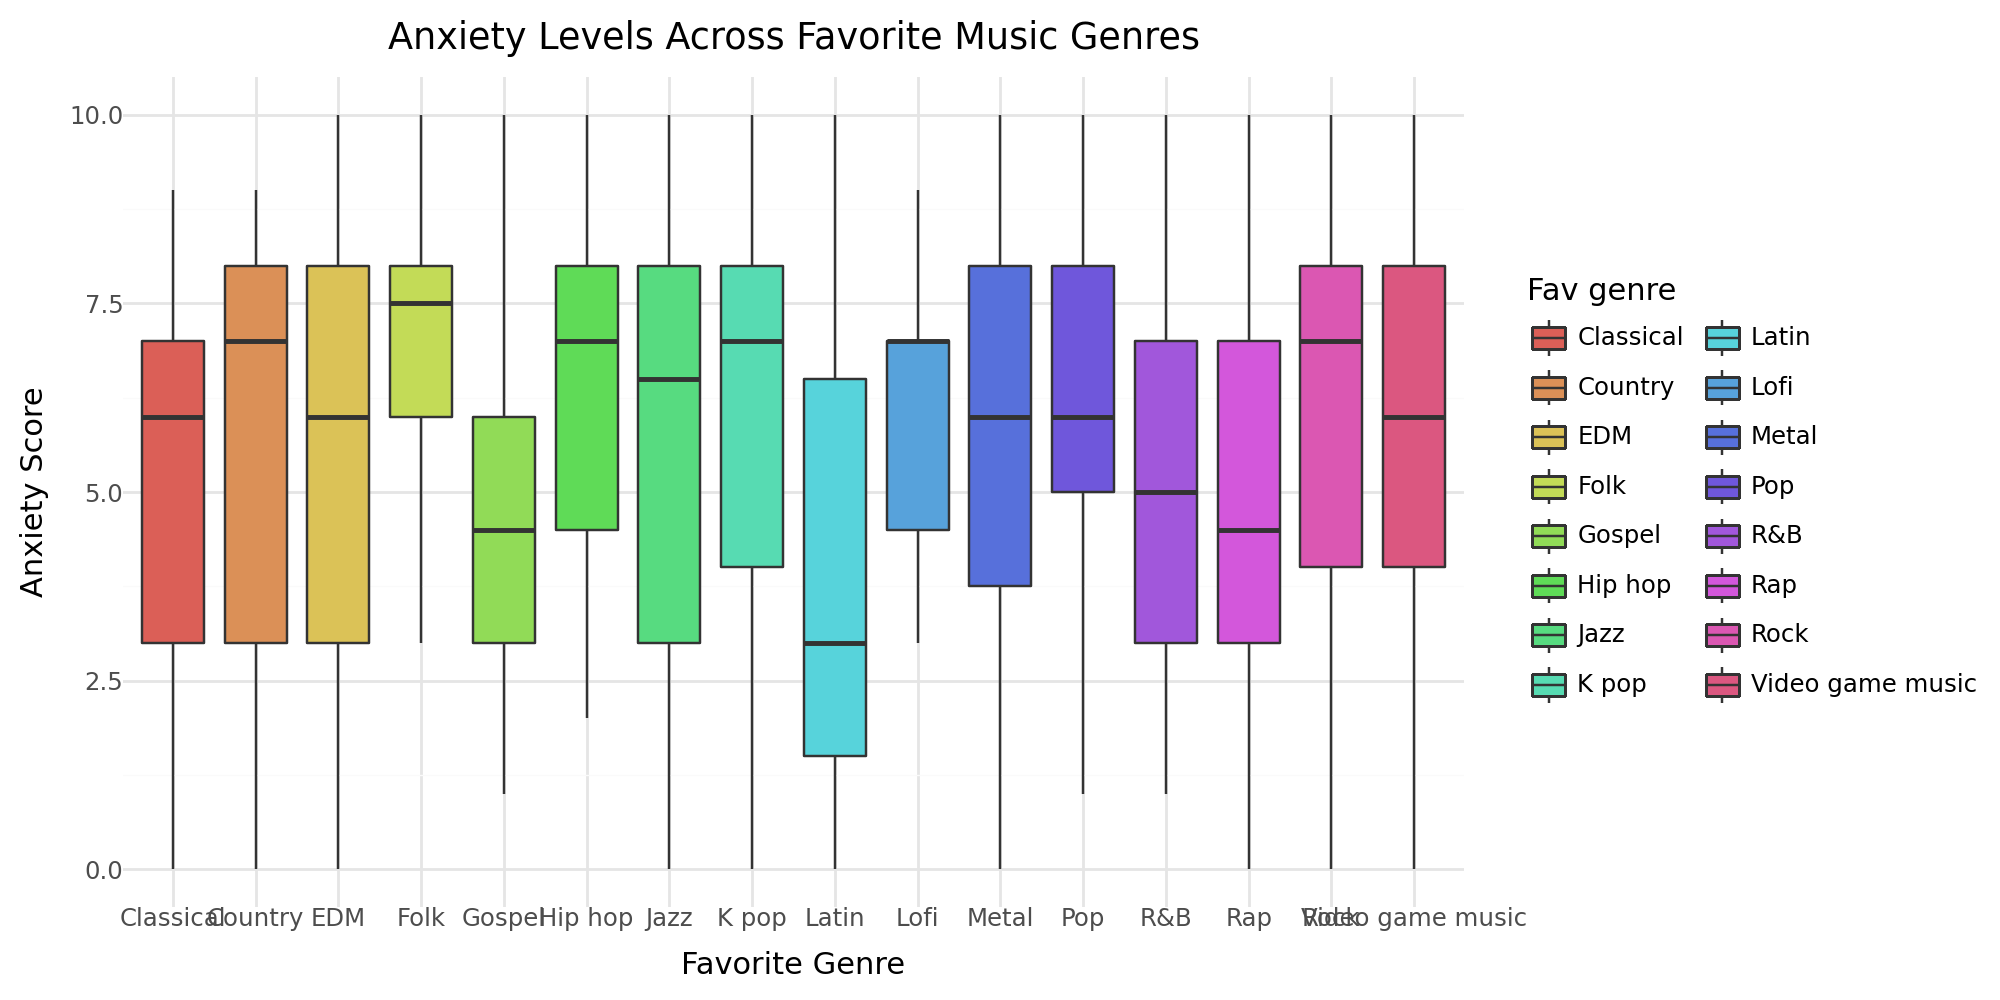

In [11]:
# Impact of favorite genre on anxiety
plot2 = ggplot(df, aes(x='Fav genre', y='Anxiety', fill='Fav genre')) + \
    geom_boxplot(outlier_alpha=0) + \
    theme(axis_text_x=element_text()) + \
    labs(title='Anxiety Levels Across Favorite Music Genres',
         x='Favorite Genre',
         y='Anxiety Score') + \
    theme_minimal()

plot2 = plot2 + theme(figure_size=(10, 5))
plot2


In [ ]:
# Display unique values for frequency listening to Latin Music
freq_latin_col = ['Frequency [Latin]']
for col in freq_latin_col:
    print(f"{col}: {df[col].unique()}")

Frequency [Latin]: ['Very frequently' 'Sometimes' 'Never' 'Rarely']


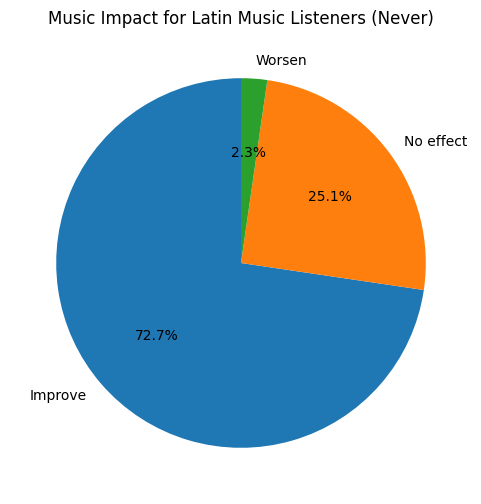

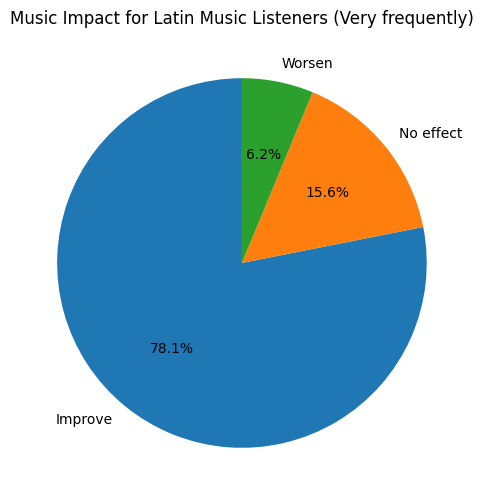

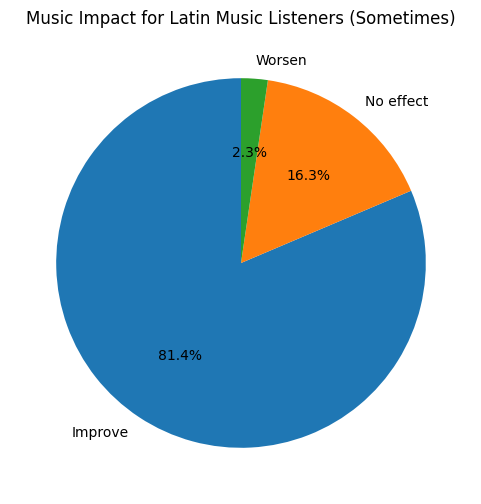

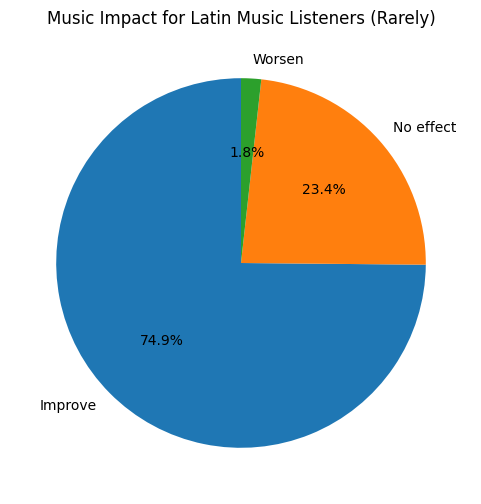

In [ ]:

# Extract relevant columns
latin_freq_col = "Frequency [Latin]"
music_effect_col = "Music effects"

# Drop rows with missing values
df_filtered = df[[latin_freq_col, music_effect_col]].dropna()

# Get unique frequency categories
freq_categories = df_filtered[latin_freq_col].unique()

# Create pie charts for each frequency category
for freq in freq_categories:
    subset = df_filtered[df_filtered[latin_freq_col] == freq]
    impact_counts = subset[music_effect_col].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(impact_counts, labels=impact_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Music Impact for Latin Music Listeners ({freq})')
    plt.show()


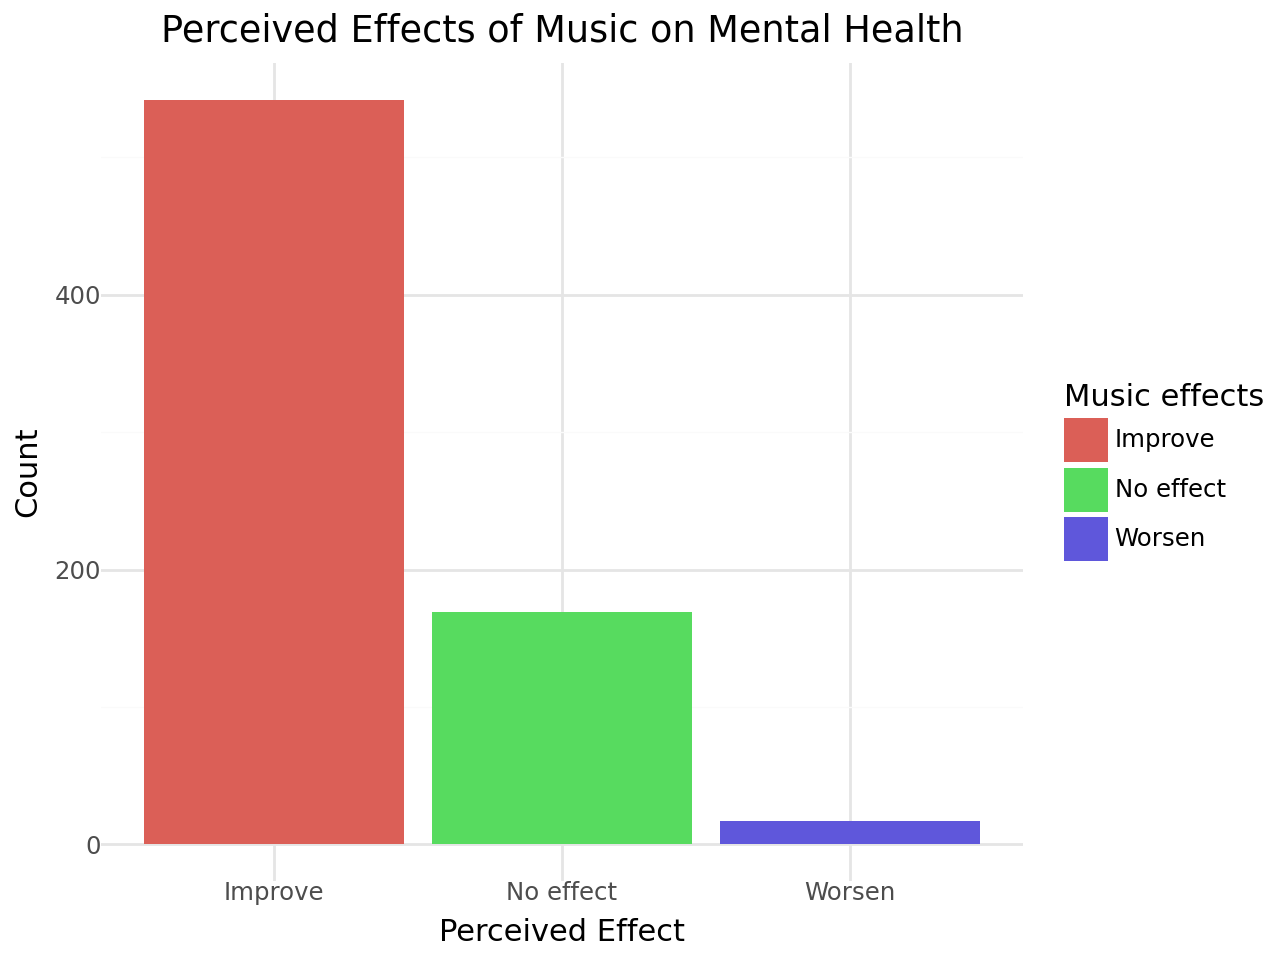

In [ ]:
# Perceived effects of music on mental health
df_filtered = df.dropna(subset=['Music effects'])
plot3 = ggplot(df_filtered, aes(x='Music effects', fill='Music effects')) + \
    geom_bar() + \
    labs(title='Perceived Effects of Music on Mental Health', x='Perceived Effect', y='Count') + \
    theme_minimal()
plot3